# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


**Note:** Since the data contains Chinese characters, we will set the encoding to `gbk`.


In [2]:
df = pd.read_csv("../data/raw/housing-data.csv", encoding="gbk")

/var/folders/2f/36vkg6px7gn5zm15kbw_0t5w0000gn/T/ipykernel_31503/3515099773.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/housing-data.csv", encoding="gbk")


We will observe the shape and the number of data points.


In [3]:
df.shape

(318851, 26)

To get familiar with the overall structure of the data, we will look at its first rows.


In [4]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


## Columns description

Here, the names and descriptions of each column are written.

|       `column`        | **Description**                                                                                                                                          |
| :-------------------: | :------------------------------------------------------------------------------------------------------------------------------------------------------- |
|         `url`         | the url which fetches the data                                                                                                                           |
|         `id`          | the id of transaction                                                                                                                                    |
|         `Lng`         | Lng coordinates, using the BD09 protocol.                                                                                                                |
|         `Lat`         | Lat coordinates, using the BD09 protocol.                                                                                                                |
|         `Cid`         | community id                                                                                                                                             |
|      `tradeTime`      | the time of transaction                                                                                                                                  |
|         `DOM`         | active days on market.Know more in [here](https://en.wikipedia.org/wiki/Days_on_market).                                                                 |
|      `followers`      | the number of people follow the transaction.                                                                                                             |
|     `totalPrice`      | the total price                                                                                                                                          |
|        `price`        | the average price by square                                                                                                                              |
|       `square`        | the square of house                                                                                                                                      |
|     `livingRoom`      | the number of living room                                                                                                                                |
|     `drawingRoom`     | the number of drawing room                                                                                                                               |
|       `kitchen`       | the number of kitchen                                                                                                                                    |
|      `bathroom`       | the number of bathroom                                                                                                                                   |
|        `floor`        | the height of the house. I will turn the Chinese characters to English in the next version.                                                              |
|    `buildingType`     | including tower (1), bungalow (2)，combination of plate and tower (3), plate (4).                                                                        |
|  `constructionTime`   | the time of construction                                                                                                                                 |
| `renovationCondition` | including other (1), rough (2), Simplicity (3), hardcover (4)                                                                                            |
|  `buildingStructure`  | including unknown (1), mixed (2), brick and wood (3), brick and concrete (4), steel (5) and steel-concrete composite (6).                                |
|     `ladderRatio`     | the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average. |
|      `elevator`       | have (1) or not have elevator (0)                                                                                                                        |
|  `fiveYearsProperty`  | if the owner have the property for less than 5 years.                                                                                                    |
|       `subway`        | have access to subway (1) or not (0)                                                                                                                     |
|      `district`       | district number                                                                                                                                          |
|  `communityAverage`   |                                                                                                                                                          |


# Preprocessing


## Drop unnecessary data


We will remove the columns `url`, `id`, `Cid`, and `communityAverage` from the DataFrame as they do not contain statistical information.


In [5]:
df.drop(["url", "id", "Cid", "communityAverage"], axis=1, inplace=True)

## Missing data


Here, we will check how many of the data points have a value equal to `NaN`.


In [6]:
df.isna().sum()

Lng                         0
Lat                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
dtype: int64

As we can see, the `DOM` column has a lot of missing data. If we were to remove the rows with missing values, we would lose more than half of the data. We also cannot delete the entire `DOM` column because it contains useful statistical information. Therefore, we need to fill in the missing values with an appropriate method.


So, we will first draw a box plot for it. A box plot is a chart used to describe the distribution of data. In this plot, a box is used to display the range between the first and third quartiles, with a line inside the box indicating the median (second quartile). Outside the box, the minimum and maximum values of the data are also indicated.


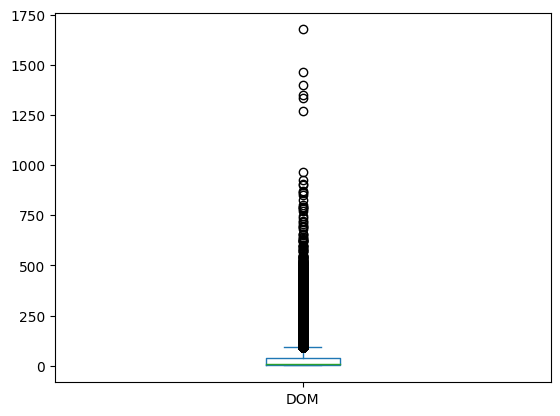

In [7]:
df["DOM"].plot(kind="box");

By looking at the chart, we understand that the values do not have a suitable spread. Therefore, using the mean or median is not a good method for replacing the missing values. Instead, we will use the mode.


In [8]:
DOM_MODE = df["DOM"].mode()[0]
DOM_MODE

1.0

In [9]:
df.fillna({"DOM": DOM_MODE}, inplace=True)

Additionally, the `buildingType` column also has missing values. As we know, the `buildingType` column includes tower (1), bungalow (2), combination of plate and tower (3), plate (4). Therefore, we will set the missing values to 0, meaning unknown.


In [10]:
df.fillna({"buildingType": 0}, inplace=True)

Then, we will remove the rows with missing values in the `elevator`, `subway` and `fiveYearsProperty` columns.


In [11]:
df.dropna(subset=["elevator", "subway", "fiveYearsProperty"], inplace=True)

Now we will check again to ensure that no missing values remain.


In [12]:
df.isna().sum()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
dtype: int64

## Convert data types


We will use the following command to view the data types of each column.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   followers            318819 non-null  int64  
 5   totalPrice           318819 non-null  float64
 6   price                318819 non-null  int64  
 7   square               318819 non-null  float64
 8   livingRoom           318819 non-null  object 
 9   drawingRoom          318819 non-null  object 
 10  kitchen              318819 non-null  int64  
 11  bathRoom             318819 non-null  object 
 12  floor                318819 non-null  object 
 13  buildingType         318819 non-null  float64
 14  constructionTime     318819 non-null  object 
 15  renovationCondition  3

As we can see, the data types are not stored correctly in the DataFrame. Therefore, we need to convert and optimize the data types.


### Categorical data types


The values in the `buildingType`, `renovationCondition`, and `buildingStructure` columns are categorical and descriptive. Therefore, we will replace their values with their original corresponding labels.


In [14]:
df.replace(
    to_replace={
        "buildingType": {
            0: "unknown",
            1: "tower",
            2: "bungalow",
            3: "ombination of plate and tower",
            4: "plate",
        },
        "renovationCondition": {
            1: "other",
            2: "rough",
            3: "simplicity",
            4: "hardcover",
        },
        "buildingStructure": {
            1: "unknown",
            2: "mixed",
            3: "brick and wood",
            4: "brick and concrete",
            5: "steel",
            6: "steel-concrete composite",
        },
    },
    inplace=True,
)

df.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,...,高 26,tower,2005,simplicity,steel-concrete composite,0.217,1.0,0.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,...,高 22,tower,2004,hardcover,steel-concrete composite,0.667,1.0,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,...,中 4,plate,2005,simplicity,steel-concrete composite,0.500,1.0,0.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,...,底 21,tower,2008,other,steel-concrete composite,0.273,1.0,0.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,...,中 6,plate,1960,rough,mixed,0.333,0.0,1.0,1.0,1


### Boolean data types


The values in the `elevator`, `subway`, and `fiveYearsProperty` columns are also boolean. Therefore, we will convert their data types to boolean.


In [15]:
df["elevator"] = df["elevator"].astype("bool")
df["subway"] = df["subway"].astype("bool")
df["fiveYearsProperty"] = df["fiveYearsProperty"].astype("bool")

### Datetime data types


The `tradeTime` column is of datetime type, so we will also convert it accordingly.


In [16]:
df["tradeTime"] = pd.to_datetime(df["tradeTime"])

### Numerical data types


The `DOM`, `livingRoom`, `drawingRoom`, and `bathRoom` columns are also numeric. We will convert these columns as well.


In [17]:
df["DOM"] = df["DOM"].astype("int")
df["livingRoom"] = df["livingRoom"].astype("int")
df["drawingRoom"] = df["drawingRoom"].astype("int")
df["bathRoom"] = df["bathRoom"].astype("int")

To determine why the `constructionTime` column is considered as an object type, we first need to check its values. We can use the following command to view all the values in this column.


In [18]:
df["constructionTime"].unique()

array(['2005', '2004', '2008', '1960', '1997', '2009', '2006', '1991',
       '2001', '1990', '2011', '2000', '1998', '2010', '1996', '1993',
       '2002', '未知', '2012', '1989', '2003', '2007', '1994', '1984',
       '1992', '2014', '1985', '2013', '1999', '1979', '1981', '1976',
       '1982', '1975', '1983', '1986', '1995', '1965', '1988', '1987',
       '2015', '1955', '1980', '1978', '1958', '1970', '1956', '1977',
       '1964', '1963', '1967', '2016', '1974', '1973', '1959', '1954',
       '1962', '1966', '1957', '1944', '1972', '1971', '1953', '1968',
       '1961', '1950', '1952', '1933', '1969', '1906', '1934', '1914'],
      dtype=object)

As we can see, there is a non-numeric value "未知" (meaning "unknown") in the column. While we could fill this value with statistical data like the mean, median, or mode, we intend to remove all rows where the value is "未知" from the DataFrame. After removing the rows, we will convert the data type to numeric.


In [19]:
df.drop(df[df["constructionTime"] == "未知"].index, inplace=True)
df["constructionTime"] = df["constructionTime"].astype("int")

We will also examine the values in the `floor` column.


In [20]:
df["floor"].unique()

array(['高 26', '高 22', '中 4', '底 21', '中 6', '中 8', '高 6', '高 10', '中 23',
       '底 11', '底 3', '高 24', '低 23', '中 19', '高 18', '低 25', '中 12',
       '中 14', '中 30', '中 27', '中 5', '低 18', '底 28', '中 11', '低 9',
       '顶 7', '顶 27', '中 17', '顶 6', '中 24', '中 15', '底 5', '中 29',
       '顶 19', '顶 5', '中 9', '低 22', '顶 18', '低 16', '高 13', '高 9', '低 6',
       '高 17', '底 6', '中 28', '低 26', '底 15', '高 16', '底 2', '中 13',
       '低 33', '底 14', '高 15', '底 4', '顶 11', '顶 16', '底 18', '顶 17',
       '低 14', '低 10', '底 20', '高 12', '低 31', '低 30', '低 19', '中 32',
       '低 12', '中 10', '中 16', '顶 20', '底 19', '中 31', '低 13', '底 10',
       '高 25', '中 21', '中 20', '高 20', '低 21', '低 24', '顶 4', '高 21',
       '高 7', '中 22', '底 1', '中 7', '底 8', '顶 15', '高 28', '顶 14', '顶 13',
       '低 20', '底 26', '低 17', '顶 24', '底 23', '顶 3', '顶 21', '底 24',
       '高 30', '高 11', '底 25', '高 27', '底 9', '低 11', '低 7', '低 28',
       '中 18', '低 15', '顶 26', '低 34', '顶 12', '中 25', '高 8', '底 17',
       '

Based on the translation of the Chinese characters in this column, we notice that the values include two different types of data: the first represents the height of each floor using Chinese characters, and the second indicates the number of floors. We will create two new columns in the DataFrame to store these new values, and then remove the original column.


In [21]:
def floor_height(floor):
    return {
        "未知": "Unknown",
        "底": "Bottom",
        "低": "Low",
        "中": "Middle",
        "高": "High",
        "顶": "Top",
    }[floor.split()[0]]


def number_of_floors(floor):
    return int(floor.split()[1])


df["floorHeight"] = df["floor"].apply(floor_height)
df["numberOfFloors"] = df["floor"].apply(number_of_floors)
df.drop("floor", axis=1, inplace=True)

After converting the data, we will review the data types in each column again, and then examine a few of the initial rows in the DataFrame.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299536 entries, 0 to 318849
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  299536 non-null  float64       
 1   Lat                  299536 non-null  float64       
 2   tradeTime            299536 non-null  datetime64[ns]
 3   DOM                  299536 non-null  int64         
 4   followers            299536 non-null  int64         
 5   totalPrice           299536 non-null  float64       
 6   price                299536 non-null  int64         
 7   square               299536 non-null  float64       
 8   livingRoom           299536 non-null  int64         
 9   drawingRoom          299536 non-null  int64         
 10  kitchen              299536 non-null  int64         
 11  bathRoom             299536 non-null  int64         
 12  buildingType         299536 non-null  object        
 13  constructionTime   

In [23]:
df.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,floorHeight,numberOfFloors
0,116.475489,40.019520,2016-08-09,1464,106,415.0,31680,131.00,2,1,...,2005,simplicity,steel-concrete composite,0.217,True,False,True,7,High,26
1,116.453917,39.881534,2016-07-28,903,126,575.0,43436,132.38,2,2,...,2004,hardcover,steel-concrete composite,0.667,True,True,False,7,High,22
2,116.561978,39.877145,2016-12-11,1271,48,1030.0,52021,198.00,3,2,...,2005,simplicity,steel-concrete composite,0.500,True,False,False,7,Middle,4
3,116.438010,40.076114,2016-09-30,965,138,297.5,22202,134.00,3,1,...,2008,other,steel-concrete composite,0.273,True,False,False,6,Bottom,21
4,116.428392,39.886229,2016-08-28,927,286,392.0,48396,81.00,2,1,...,1960,rough,mixed,0.333,False,True,True,1,Middle,6


## Drop outlier data

In this section, we aim to remove outlier values from the DataFrame.


The `totalPrice` column, which stores the final prices of the houses, is considered an important data point for analysis.

First, we will examine the data dispersion using a box plot.


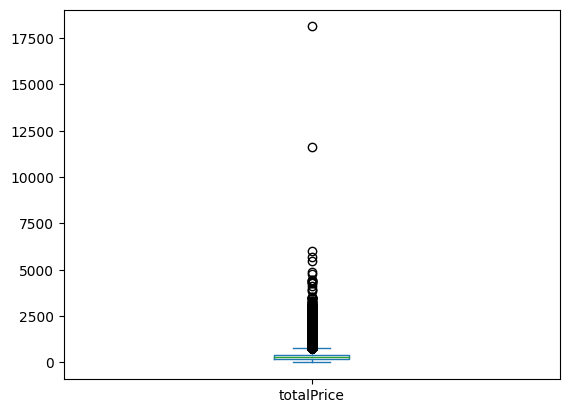

In [24]:
df["totalPrice"].plot(kind="box");

As we can see, there are several extreme outliers in this column. We will use the interquartile range (IQR) criterion to identify and remove these outliers from the DataFrame.


In [25]:
total_price = df["totalPrice"]

Q1 = total_price.quantile(0.25)
Q3 = total_price.quantile(0.75)
IQR = Q3 - Q1

df.drop(
    df[(total_price < Q1 - 1.5 * IQR) | (Q3 + 1.5 * IQR < total_price)].index,
    inplace=True,
)

Now, we will redraw the box plot.


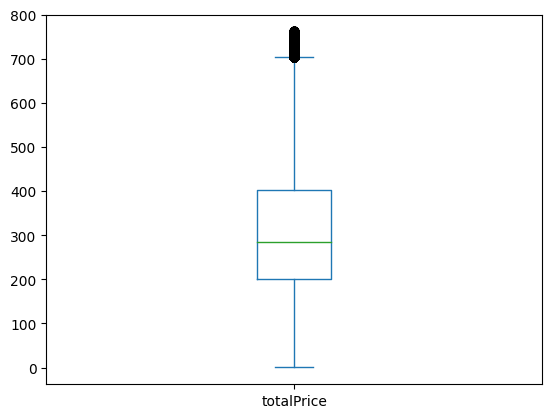

In [26]:
df["totalPrice"].plot(kind="box");

As we can see now, the data has a suitable dispersion.


## Add new features


We want to add a new data column that will be useful for analysis, using the current columns in the DataFrame. The distance of each house from the center of Beijing is a valuable metric. The longitude of Beijing is `116.4074` and its latitude is `39.9042`. We can use the following mathematical formula to calculate the distance of each house from the city center:

$$ distance = cos^{-1}(sin\varphi*1*sin\varphi_2 + cos\varphi_1*cos\varphi_2 * cos(\lambda*2-\lambda_1)) * 6371.0088 $$

$ \varphi $ is latitude, $ \lambda $ is longitude and $ 6371.0088 $ is the approximate radius of the Earth in kilometers.


In [27]:
from math import radians, sin, cos

capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

lat = np.radians(df["Lat"])
lng = np.radians(df["Lng"])

df["distanceToCapital"] = np.round(
    np.arccos(
        (np.sin(lat) * sin(capital_Lat))
        + (np.cos(lat) * cos(capital_Lat) * np.cos(capital_Lng - lng))
    )
    * 6371.0088,
    decimals=2,
)

df.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,floorHeight,numberOfFloors,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464,106,415.0,31680,131.00,2,1,...,simplicity,steel-concrete composite,0.217,True,False,True,7,High,26,14.07
1,116.453917,39.881534,2016-07-28,903,126,575.0,43436,132.38,2,2,...,hardcover,steel-concrete composite,0.667,True,True,False,7,High,22,4.70
3,116.438010,40.076114,2016-09-30,965,138,297.5,22202,134.00,3,1,...,other,steel-concrete composite,0.273,True,False,False,6,Bottom,21,19.29
4,116.428392,39.886229,2016-08-28,927,286,392.0,48396,81.00,2,1,...,rough,mixed,0.333,False,True,True,1,Middle,6,2.68
5,116.466280,39.991363,2016-07-22,861,57,275.6,52000,53.00,1,0,...,simplicity,steel-concrete composite,0.333,True,True,False,7,Middle,8,10.91


# Analysis

## General overview of the data


We want to extract information suited to our needs by visualizing the data using various methods. Our dataset has no missing values, no outliers, and no columns with inappropriate formats. In the first step, we will take a look at the histograms of the numeric columns.


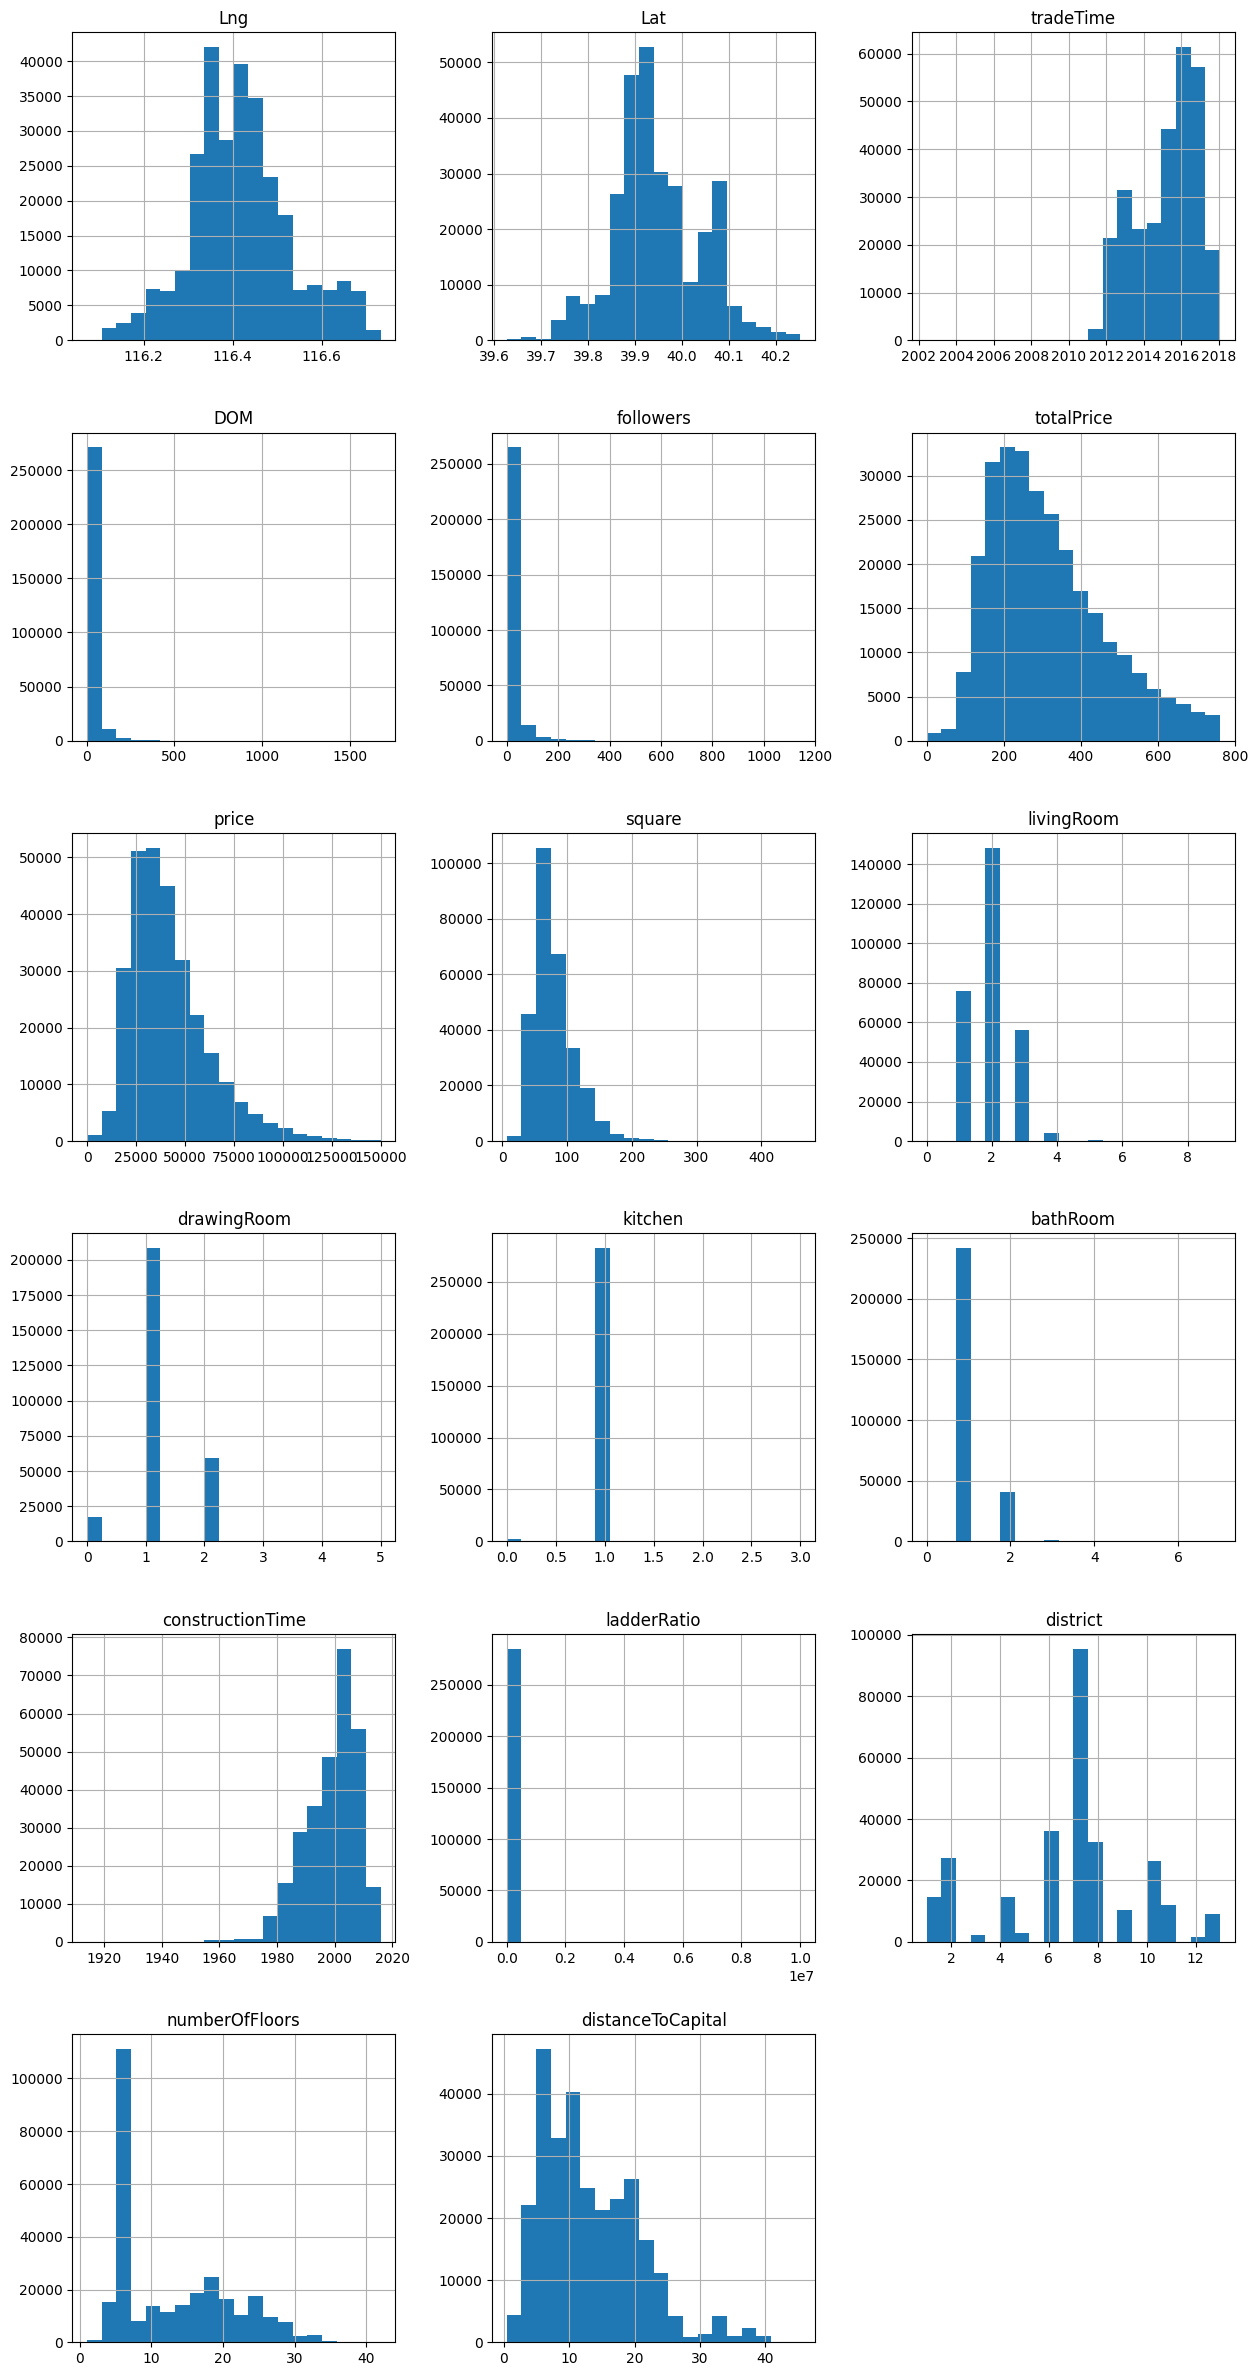

In [28]:
df.hist(bins=20, layout=(6, 3), figsize=(15, 30));

## Effects on `price`


### Effect of `distanceToCapital` on `price`


Now we want to use the new column we created to see how the price per square meter of the houses changes as the distance from the city center increases.


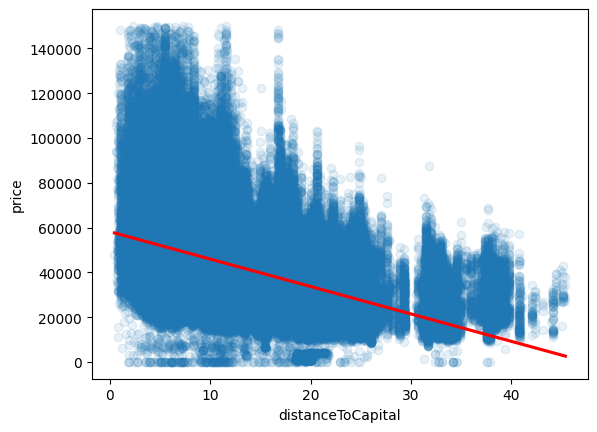

In [29]:
sns.regplot(
    df,
    x="distanceToCapital",
    y="price",
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.1},
);

As we can see, with increasing distance from the city center, not only does the price of houses decrease, but the number of houses also decreases.


### Effect of `elevator` on `price`


Here, we want to examine the impact of having an elevator on house prices.


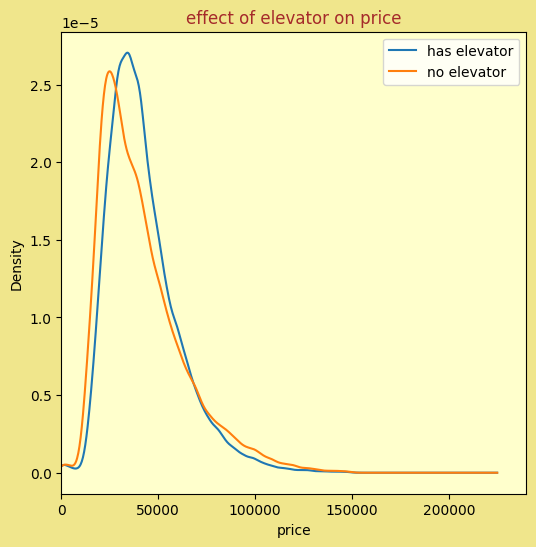

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

df[df["elevator"]]["price"].plot(kind="kde", label="has elevator", ax=ax)
df[~(df["elevator"])]["price"].plot(kind="kde", label="no elevator", ax=ax)

fig.set_facecolor("khaki")
ax.set_facecolor("#ffffcc")
ax.set_title("effect of elevator on price", color="brown")
ax.set_xlabel("price")
ax.set_xlim(0)
ax.legend();

### Effect of `subway` on `price`


Here, we want to examine the impact of having an access to subway on house prices.


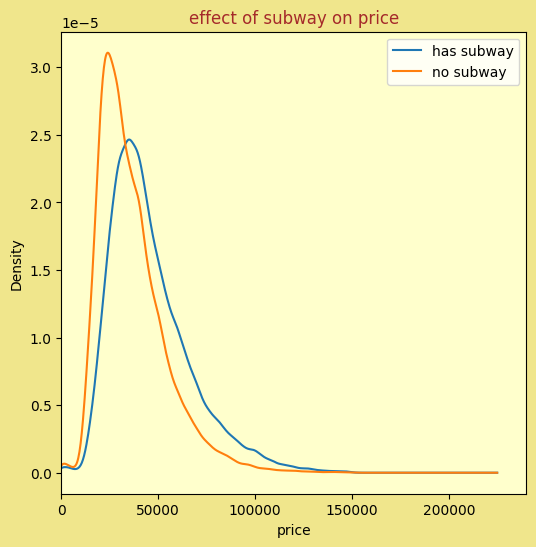

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))

df[df["subway"]]["price"].plot(kind="kde", label="has subway", ax=ax)
df[~(df["subway"])]["price"].plot(kind="kde", label="no subway", ax=ax)

fig.set_facecolor("khaki")
ax.set_facecolor("#ffffcc")
ax.set_title("effect of subway on price", color="brown")
ax.set_xlabel("price")
ax.set_xlim(0)
ax.legend();

## Plot on map


Because the volume of data is very large, we will create a sample consisting of 1% of the data. From now on, we will use this sample to generate charts and conduct our analysis.


In [32]:
housing_sample = df.sample(frac=0.01)
housing_sample.shape

(2850, 24)

In the following chart, you can observe the distribution of houses.


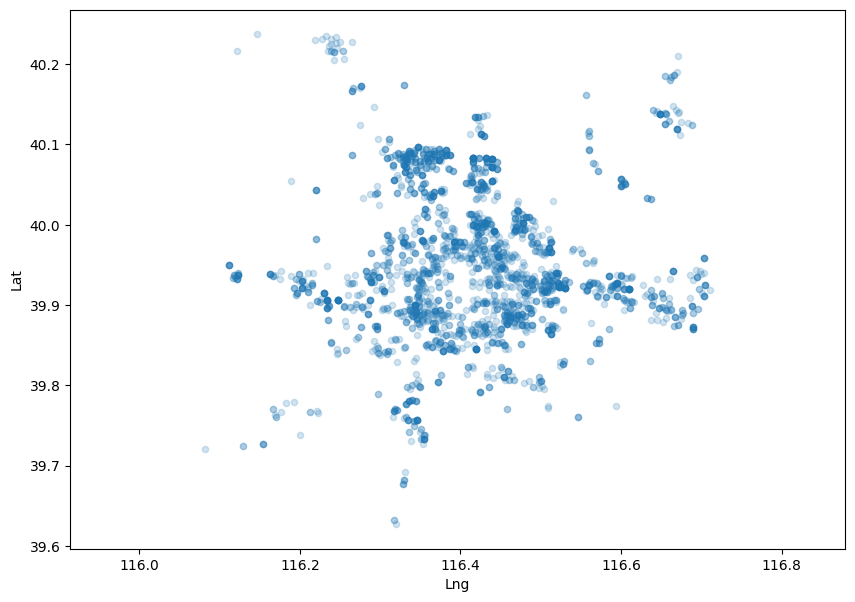

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))

housing_sample.plot(x="Lng", y="Lat", ax=ax, kind="scatter", alpha=0.2)

ax.axis("equal");

### by `price`


We can also visualize the price range of houses on the map using color coding.


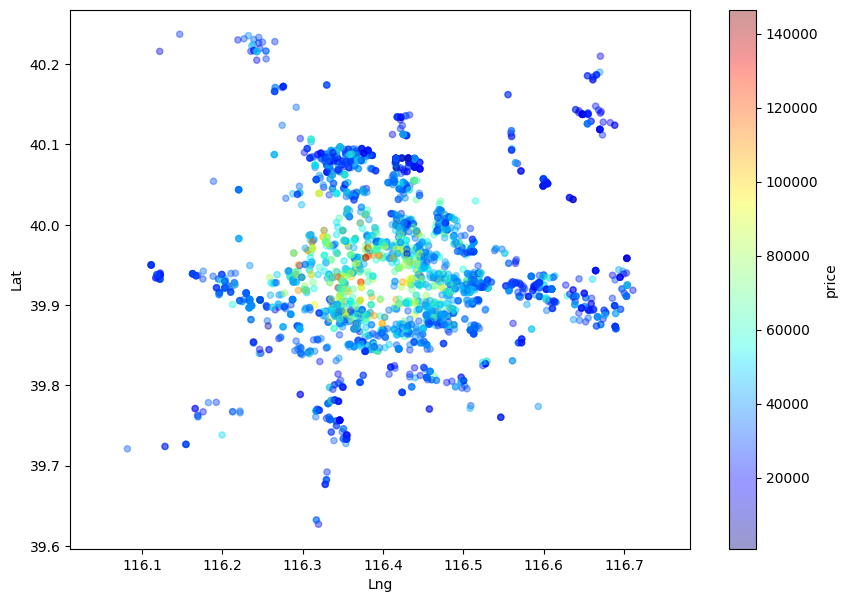

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

housing_sample.plot(
    x="Lng",
    y="Lat",
    ax=ax,
    kind="scatter",
    alpha=0.4,
    c="price",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

ax.axis("equal");

By setting the size, we can also display the square of each house on the plot.


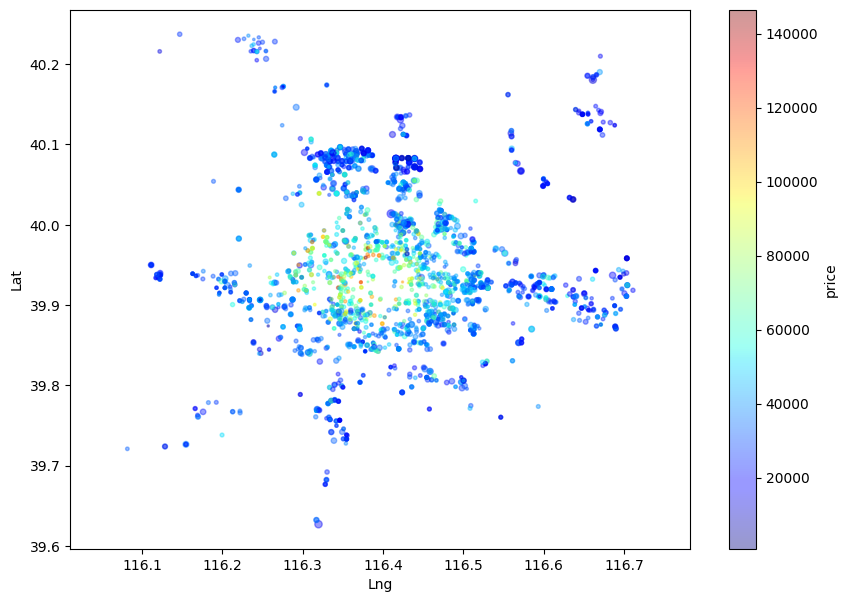

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))

housing_sample.plot(
    x="Lng",
    y="Lat",
    ax=ax,
    kind="scatter",
    alpha=0.4,
    c="price",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    s=housing_sample["square"] / 10,
)

ax.axis("equal");

We will use a marker to indicate the center of Beijing to provide a better understanding of the distribution.


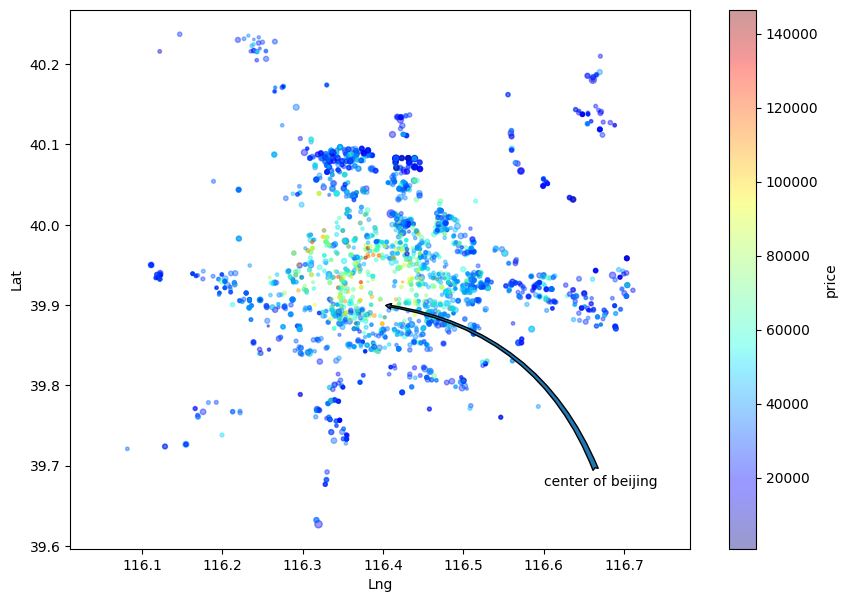

In [36]:
from matplotlib.patches import ConnectionStyle

connectionstyle = ConnectionStyle("Arc3", rad=0.3)

ax.annotate(
    text="center of beijing",
    xy=(116.40, 39.90),
    xytext=(116.6, 39.675),
    arrowprops=dict(arrowstyle="fancy", connectionstyle=connectionstyle),
)

fig

By adding a map of Beijing, we can gain a better perspective on the data.


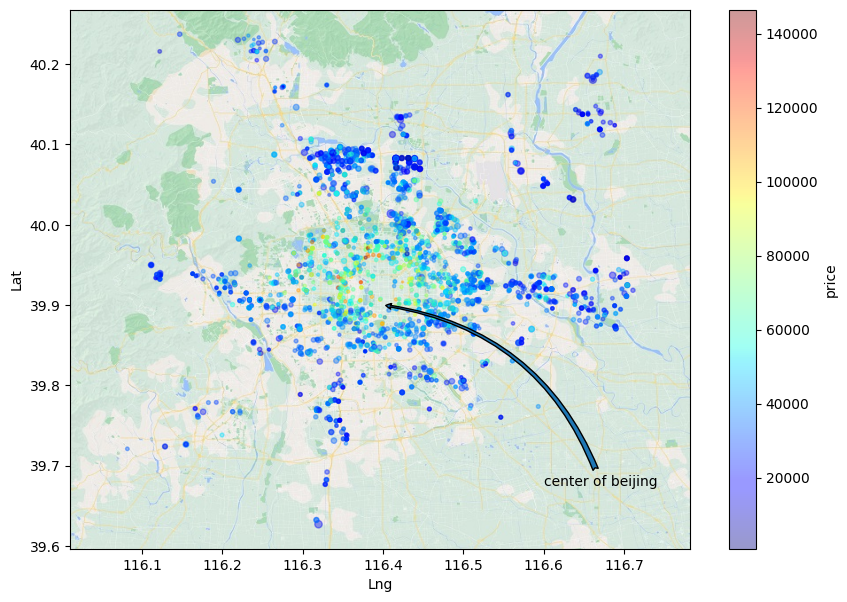

In [37]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread("../data/raw/beijing-map-1.jpg")
ax.imshow(beijing_img, extent=[*ax.get_xlim(), *ax.get_ylim()])

fig

### By `district`


Now, we want to categorize the houses based on their district numbers and display them on the map.


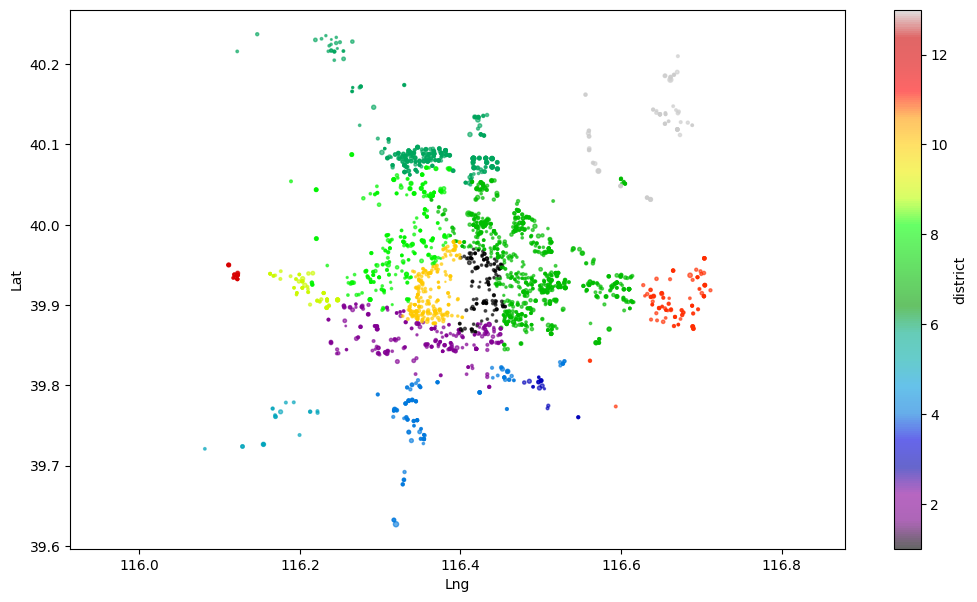

In [38]:
fig, ax = plt.subplots(figsize=(12.5, 7))

housing_sample.plot(
    x="Lng",
    y="Lat",
    ax=ax,
    kind="scatter",
    alpha=0.6,
    c="district",
    cmap=plt.get_cmap("nipy_spectral"),
    s=housing_sample["square"] / 20,
)

ax.axis("equal");

By adding a map of Beijing, we can gain a better perspective on the data.


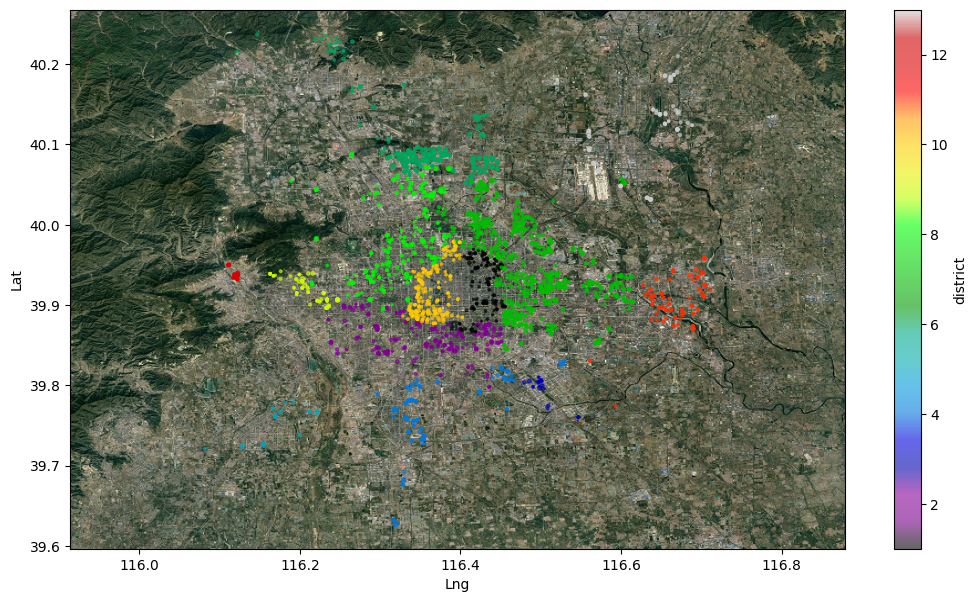

In [39]:
beijing_img2 = mpimg.imread("../data/raw/beijing-map-2.jpg")
ax.imshow(beijing_img2, extent=[*ax.get_xlim(), *ax.get_ylim()])

fig

We want to obtain information for each district. We will create a DataFrame named `districts_df` and set its index to the `district` column. Then, for each district, we will obtain the following:

|          **Column**          | **Description**                                            |
| :--------------------------: | :--------------------------------------------------------- |
|    `pricePerSquare mean`     | Average price per square meter                             |
|   `% houses with elevator`   | Percentage of houses with an elevator                      |
|    `% houses with subway`    | Percentage of houses with subway access                    |
|        `square mean`         | Average area of houses                                     |
|     `building age mean`      | Average age of houses (age calculated up to the year 2021) |
| `frequent buildingStructure` | Most common building structure                             |


In [40]:
district_grouped = df.groupby("district")

districts_df = pd.DataFrame(index=district_grouped.groups.keys())
districts_df.index.name = "district"
districts_df["price mean"] = district_grouped["price"].mean()
districts_df["% houses with elevator"] = (
    district_grouped["elevator"].sum() / district_grouped.size() * 100
)
districts_df["% houses with subway"] = (
    district_grouped["subway"].sum() / district_grouped.size() * 100
)
districts_df["square mean"] = district_grouped["square"].mean()
districts_df["building age mean"] = 2021 - district_grouped["constructionTime"].mean()
building_structure_data = district_grouped["buildingStructure"].value_counts()
districts_df["frequent buildingStructure"] = [
    building_structure_data.loc[i].index[0] for i in districts_df.index
]

districts_df

,price mean,% houses with elevator,% houses with subway,square mean,building age mean,frequent buildingStructure
district,,,,,,
1,59818.226088,56.216550,93.488404,67.047856,25.151709,steel-concrete composite
2,38059.693444,68.647623,61.825544,76.951352,20.639123,steel-concrete composite
3,31303.801709,66.636691,47.032374,92.071484,15.494604,steel-concrete composite
4,29999.754911,39.983398,43.027117,86.322272,18.324364,mixed
5,28418.080882,80.077031,39.005602,89.297990,11.271359,steel-concrete composite
6,29522.665473,37.892663,43.553669,100.121614,17.536464,mixed
7,42260.121072,66.746216,68.307898,78.845544,22.553717,steel-concrete composite
8,53129.601756,51.883462,61.087404,73.615248,24.191570,steel-concrete composite
9,34911.744532,46.534461,27.636823,73.047513,25.653835,steel-concrete composite


In the table above, you can see the general information for each district.


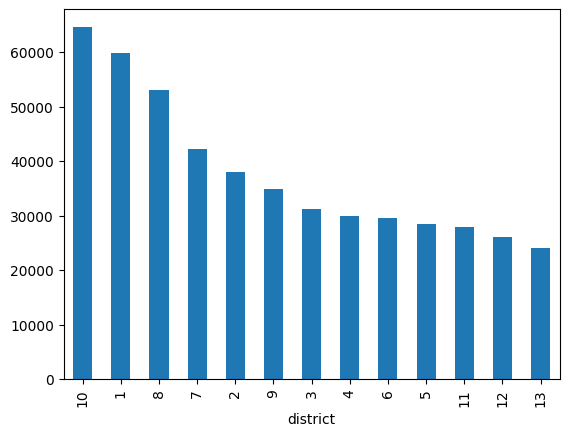

In [41]:
districts_df["price mean"].sort_values(ascending=False).plot.bar();

In the bar chart above, you can see the average house prices in each district, sorted in descending order.


## Time series


In the chart below, we observe the monthly price trend changes. Note that we have examined transactions from the year 2010 onwards.


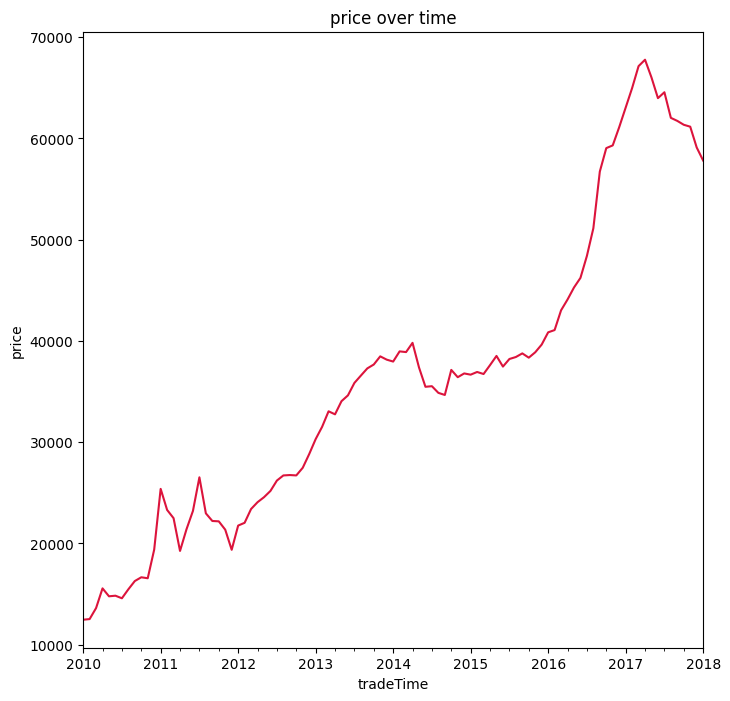

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))

df[2010 <= df["tradeTime"].dt.year].resample("ME", on="tradeTime")["price"].mean().plot(
    color="crimson"
)

ax.set_title("price over time")
ax.set_xlabel("tradeTime")
ax.set_ylabel("price");

Additionally, in the chart below, we examine the changes in the number of house transactions in the city center (within a 15-kilometer radius).


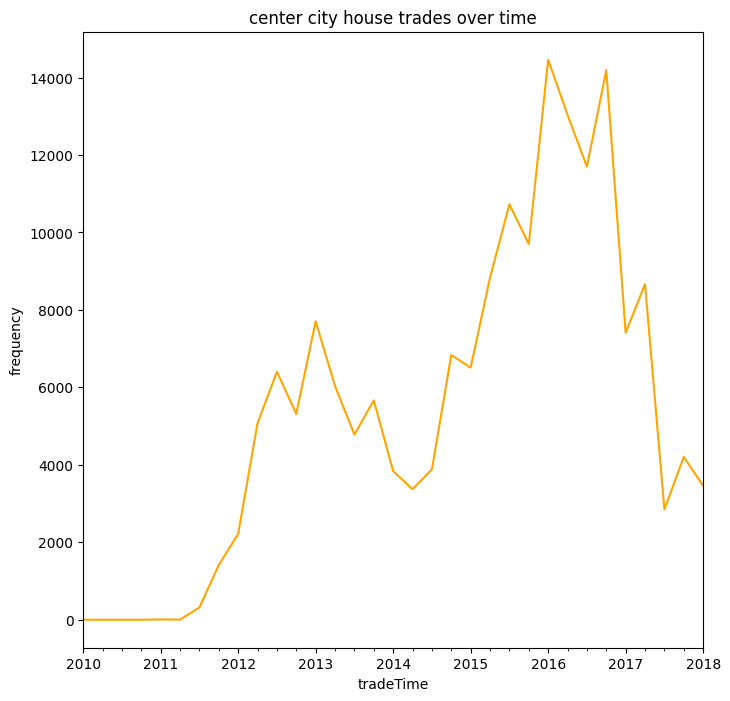

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))

df[2010 <= df["tradeTime"].dt.year].resample("3ME", on="tradeTime")[
    "distanceToCapital"
].apply(lambda x: (x <= 15).sum()).plot(color="orange")


ax.set_title("center city house trades over time")
ax.set_xlabel("tradeTime")
ax.set_ylabel("frequency");